In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from math import exp, sqrt

In [13]:
r0 = 0.03
r_bar = 0.1
K = 0.3
sigma = 0.03
T = 10 # 10 years
M = 100 # the number of intervals of T
N = 10 # the number of monte-carlo
dt = T/M

# generating r for 10 years
r = np.zeros((N, M+1))
for i in range(N):
    r[i][0] = r0
    for j in range(M):
        dr = K*(r_bar-r[i][j])*dt + sigma*np.random.normal(0, sqrt(dt))
        r[i][j+1] = r[i][j] + dr

rT_mean = []
rT_std = []
for j in range(M+1):
    t = j*dt
    rT_mean.append(r0*exp(-K*t)+r_bar*(1-exp(-K*t)))
    rT_std.append(sqrt((1-exp(-2*K*t))/(2*K)*sigma**2))


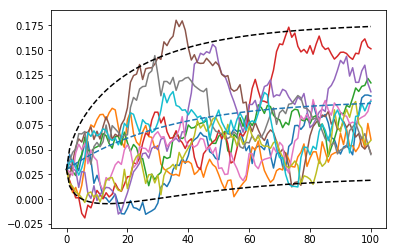

In [14]:
#plot r
for i in range(N):
    plt.plot(r[i])
plt.plot(rT_mean, '--')
plt.plot([x + 2*y for x, y in zip(rT_mean, rT_std)], 'k--')
plt.plot([x - 2*y for x, y in zip(rT_mean, rT_std)], 'k--')
plt.show()

In [28]:
# Bond price
T = 0.5 #6 months
M = 100
N = 1000
dt = T/M

r = np.zeros((N, M+1))
for i in range(N):
    r[i][0] = r0
    for j in range(M):
        dr = K*(r_bar-r[i][j])*dt + sigma*np.random.normal(0, sqrt(dt))
        r[i][j+1] = r[i][j] + dr
  
P = np.zeros(N)
for i in range(N):
    P[i] = exp(-sum(r[i])*dt)
P_mean = np.mean(P)
P_std = np.std(P)

print ("Monte Carlo Price : ", P_mean) 
print ("Monte Carlo Std : ", P_std)

Monte Carlo Price :  0.982417227742
Monte Carlo Std :  0.00553370732045


In [29]:
#confidence interval
from scipy import stats

P_ci = stats.norm.interval(0.05,loc=P_mean,scale=P_std)
print ("Monte Carlo confidence interval : ", P_ci)

Monte Carlo confidence interval :  (0.98207022678569811, 0.98276422869799041)


In [31]:
# Closed form
b = (1-exp(-T*K))/K
a = (r_bar-sigma**2/(2*K**2))*(T-b)+(sigma**2)/(4*K)*(b**2)

P_sol = exp(-a-b*r0)
print ("Closed form Price : ", P_sol)

Closed form Price :  0.9826701720581513
